# This is a Jupyter Notebook

A Jupyter Notebook is a data-science environment that combines:

1. **Narrative:** The text describing your analysis
2. **Code:** The program that does the analysis
3. **Results:** The output of the program

The Jupyter environment was created by faculty here at Berkeley (Fernando Perez). These ideas are now in a lot of different technologies (e.g., Google Collab). 


<br/><br/><br/><br/><br/>

---

## Example

**Note:** In this lecture there is a lot of code. You are not expected to know any of this yet. This is just a preview of the things you will see in the next few weeks. 

<br/><br/><br/><br/>


We can use the tools of data science to study text.  For example, here we will do some basic analysis of *["Adventures of Huckleberry Finn"](https://en.wikipedia.org/wiki/Adventures_of_Huckleberry_Finn)* (by Mark Twain) and from *["Little Women"](https://en.wikipedia.org/wiki/Little_Women)* (by Louisa May Alcott).  

Often the first step in data sciences is getting the data.  The following is a tiny program to download text from the web.

Here we download the books from the data8 textbook website.

Now I will add some other information about web scraper

In [2]:
# A tiny program to download text from the web.
def read_url(url): 
    from urllib.request import urlopen 
    import re
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

re is the regular expression, urlopen(url).read() is reading the byte string.
decode() is for convert byte sting into regular string.
re.sub(pattern, replacement, string) the pattern' \\s+' means matches one or more of the white space. 
In the end it replace it to' '

In [18]:
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

In [19]:
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

Let's look at the text from the first chapter of Huckleberry Finn:

In [25]:
# write some code here
print(huck_finn_chapters[0])

I. YOU don't know about me without you have read a book by the name of The Adventures of Tom Sawyer; but that ain't no matter. That book was made by Mr. Mark Twain, and he told the truth, mainly. There was things which he stretched, but mainly he told the truth. That is nothing. I never seen anybody but lied one time or another, without it was Aunt Polly, or the widow, or maybe Mary. Aunt Polly--Tom's Aunt Polly, she is--and Mary, and the Widow Douglas is all told about in that book, which is mostly a true book, with some stretchers, as I said before. Now the way that the book winds up is this: Tom and me found the money that the robbers hid in the cave, and it made us rich. We got six thousand dollars apiece--all gold. It was an awful sight of money when it was piled up. Well, Judge Thatcher he took it and put it out at interest, and it fetched us a dollar a day apiece all the year round--more than a body could tell what to do with. The Widow Douglas she took me for her son, and allow

# Working with Tables

A lot of data science is about transforming data often to produce tables that we can more easily analyze.
In this class you will use the Berkeley datascience library to manipulate and data.

In [27]:
from datascience import *

In [29]:
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


We will explore data by extracting summaries. For example, we might ask, how often characters appeared in each chapter. We can use snippets of code to answer these questions.

In [33]:
import numpy as np

In [35]:
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [37]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

We can convert the results of our analysis into more tables.

In [54]:
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))

Tom,Jim,Huck,Chapter
6,0,3,1
30,16,5,2
35,16,7,3
35,24,8,4
35,24,8,5
35,24,10,6
37,24,10,7
39,46,15,8
39,57,16,9
39,76,16,10


<br/><br/><br/><br/><br/>


# We will Learn to Visualize Data

Plot the cumulative counts:
How many times in Chapter 1, how many times in Chapters 1 and 2, and so on.


/Users/meng/anaconda3/lib/python3.11/site-packages/datascience/tables.py:305: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


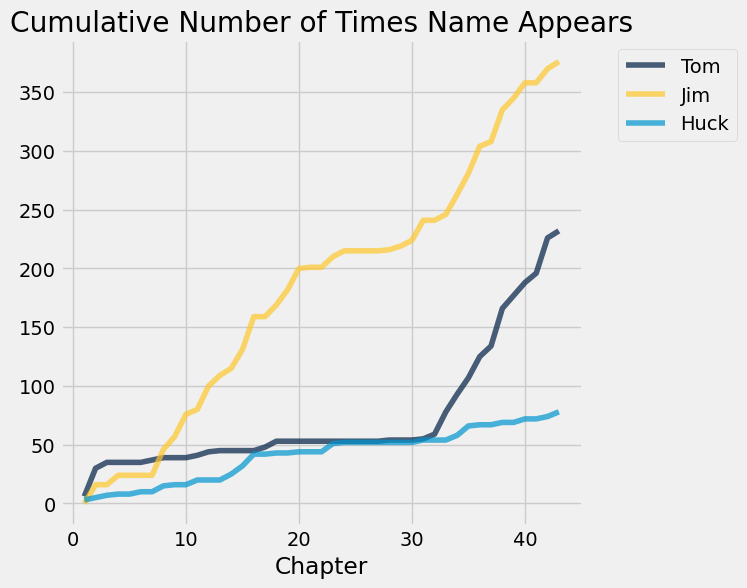

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks="Chapter")
plt.title('Cumulative Number of Times Name Appears');

What can we tell from this visualization?  What questions does this raise?


<br/><br/><br/><br/><br/>

In [56]:
# The chapters of Little Women
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


<br/><br/><br/><br/><br/>

We can explore the characters in Little Women using the same kind of analysis.

In [58]:
# Counts of names in the chapters of Little Women
names = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
mentions = {name: np.char.count(little_women_chapters, name) for name in names}
counts = Table().with_columns([
        'Amy', mentions['Amy'],
        'Beth', mentions['Beth'],
        'Jo', mentions['Jo'],
        'Laurie', mentions['Laurie'],
        'Meg', mentions['Meg']
    ])

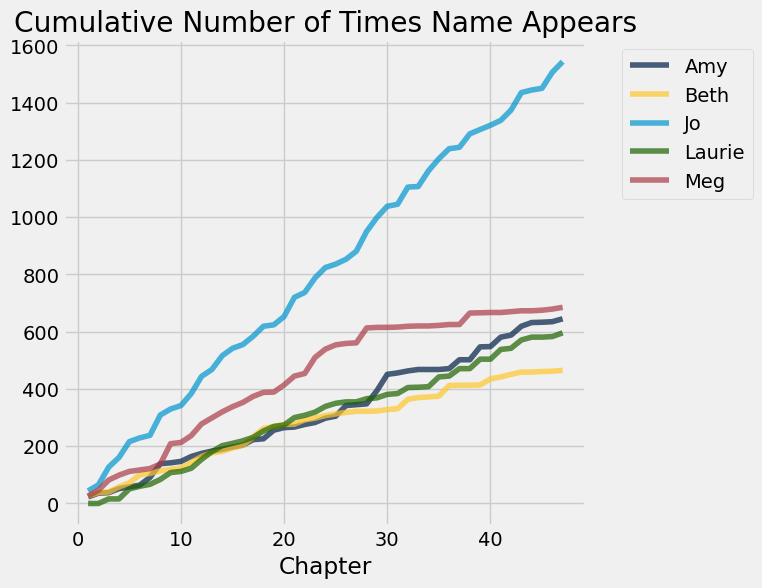

In [62]:
# Plot the cumulative counts
Table.static_plots()
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plt.title('Cumulative Number of Times Name Appears');

We can use interactive tools.

/Users/meng/anaconda3/lib/python3.11/site-packages/datascience/tables.py:305: FutureWarning:

Implicit column method lookup is deprecated.



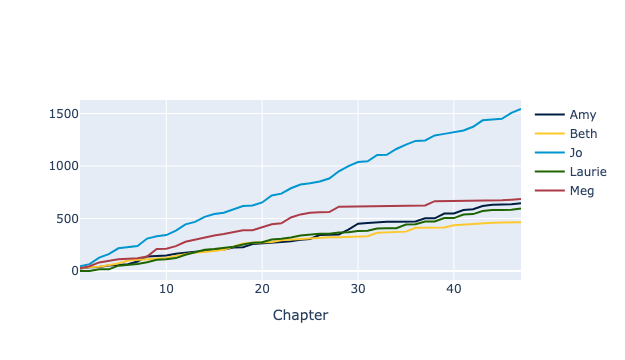

In [70]:
# Plot the cumulative counts
Table.interactive_plots()
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)

<br/><br/><br/><br/><br/> 

---

# Examining Length

How long are the books? How long are sentences?


In [16]:
len(read_url(huck_finn_url))

588035

In [72]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

length_hf = Table().with_columns([
        'Length', [len(s) for s in huck_finn_chapters],
        'Periods', np.char.count(huck_finn_chapters, '.')
    ])
length_lw = Table().with_columns([
        'Length', [len(s) for s in little_women_chapters],
        'Periods', np.char.count(little_women_chapters, '.')
    ])

In [74]:
# The counts for Huckleberry Finn
length_hf

Length,Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [76]:
# The counts for Little Women
length_lw

Length,Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


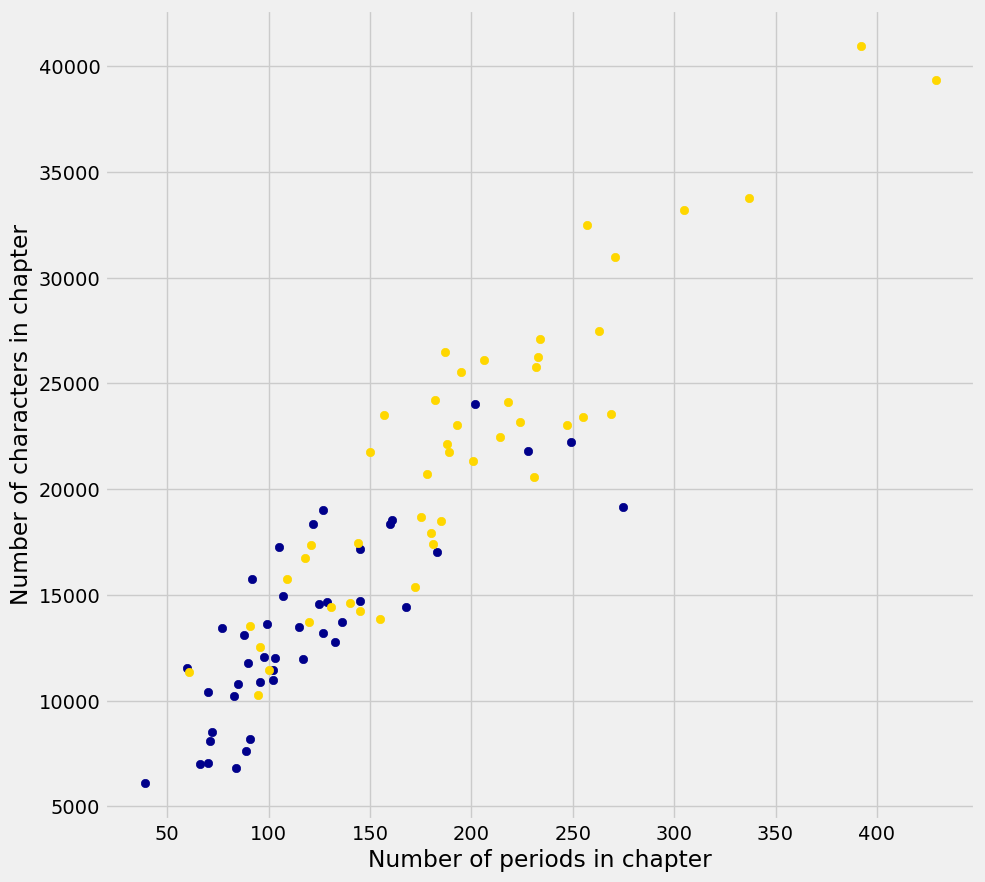

In [20]:
Table.static_plots()
plt.figure(figsize=(10,10))
plt.scatter(length_hf[1], length_hf[0], color='darkblue')
plt.scatter(length_lw[1], length_lw[0], color='gold')
plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter');

<br/><br/><br/><br/><br/>

---

## Examining distributions

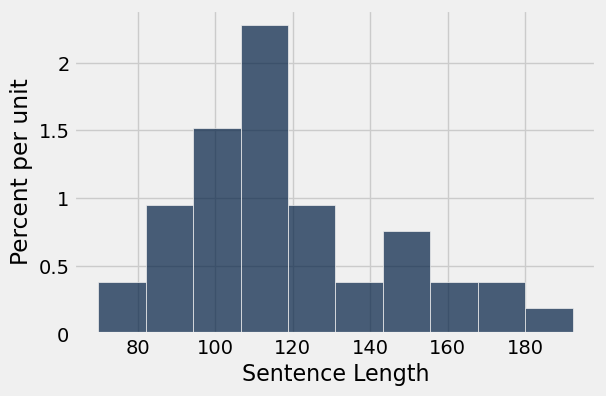

In [21]:
Table.static_plots()
length_hf.with_columns("Sentence Length", length_hf['Length']/length_hf['Periods']).hist("Sentence Length")

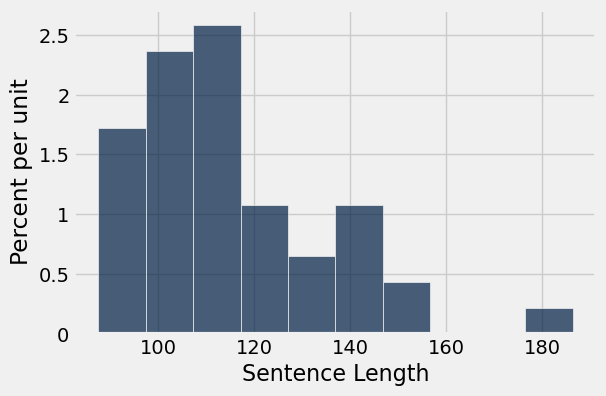

In [22]:
Table.static_plots()
length_lw.with_columns("Sentence Length", length_lw['Length']/length_lw['Periods']).hist("Sentence Length")